In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb

# Style
sb.set_style('whitegrid')

plt.figure(figsize=(10,6))
sb.histplot(data['Coverage'], bins=10, kde=True, color='blue')
plt.title('Coverage Distribution')
plt.xlabel('Coverage')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import arviz as az
column_names = model_spec.rhs.columns
# Iterate over the column names and print out the mapping
for i, name in enumerate(column_names):
    category = name.split('[')[-1].rstrip(']')
    print(f'a_m[{i}]: {category}')


def logit_to_probability(logit_vals):
    """Apply logistic transformation to logit values."""
    return 1 / (1 + np.exp(-logit_vals))


# Create a dictionary for the posterior
posterior_dict = {
    'a_m': trace.posterior['a_m'].values,
    'a_bar': trace.posterior['a_bar'].values,
    'sigma': trace.posterior['sigma'].values
    
}

for key, value in posterior_dict.items():
    posterior_dict[key] = logit_to_probability(value)


posterior_dict['theta'] = trace.posterior['theta'].values

# Create an InferenceData object
infdata = az.from_dict(posterior=posterior_dict)

# Generate a summary table with the mean and 89% HDI for all variables
summary = az.summary(infdata, hdi_prob=0.89)
summary



a_m[0]: T.codetiming._timer
a_m[1]: T.flutils.decorators
a_m[2]: T.flutils.namedtupleutils
a_m[3]: T.flutils.packages
a_m[4]: T.flutils.setuputils.cmd
a_m[5]: T.httpie.output.formatters.headers
a_m[6]: T.httpie.plugins.base
a_m[7]: T.mimesis.builtins.da
a_m[8]: T.py_backwards.transformers.base
a_m[9]: T.py_backwards.transformers.dict_unpacking
a_m[10]: T.py_backwards.transformers.return_from_generator
a_m[11]: T.py_backwards.transformers.yield_from
a_m[12]: T.py_backwards.utils.helpers
a_m[13]: T.pymonet.immutable_list
a_m[14]: T.pymonet.maybe
a_m[15]: T.pymonet.validation
a_m[16]: T.pypara.accounting.journaling
a_m[17]: T.pytutils.lazy.lazy_import
a_m[18]: T.pytutils.python
a_m[19]: T.sanic.config
a_m[20]: T.sanic.helpers
a_m[21]: T.sanic.mixins.signals
a_m[22]: T.thonny.plugins.pgzero_frontend
a_m[23]: T.typesystem.tokenize.positional_validation


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a_m[0],0.873,0.003,0.869,0.877,0.000,0.000,12222.0,2836.0,1.0
a_m[1],0.663,0.004,0.657,0.668,0.000,0.000,10990.0,2883.0,1.0
a_m[2],0.933,0.002,0.930,0.935,0.000,0.000,10530.0,2889.0,1.0
a_m[3],0.052,0.002,0.049,0.054,0.000,0.000,9055.0,2867.0,1.0
a_m[4],0.077,0.002,0.074,0.080,0.000,0.000,11094.0,3096.0,1.0
a_m[5],0.598,0.004,0.592,0.603,0.000,0.000,12113.0,3003.0,1.0
a_m[6],0.747,0.003,0.742,0.753,0.000,0.000,13172.0,2694.0,1.0
a_m[7],0.793,0.003,0.788,0.798,0.000,0.000,13837.0,3021.0,1.0
a_m[8],0.279,0.003,0.273,0.284,0.000,0.000,10633.0,2697.0,1.0
a_m[9],0.140,0.003,0.136,0.144,0.000,0.000,10448.0,2917.0,1.0


array([[<Axes: title={'center': 'a_m_prob'}>,
        <Axes: title={'center': 'a_m_prob'}>]], dtype=object)

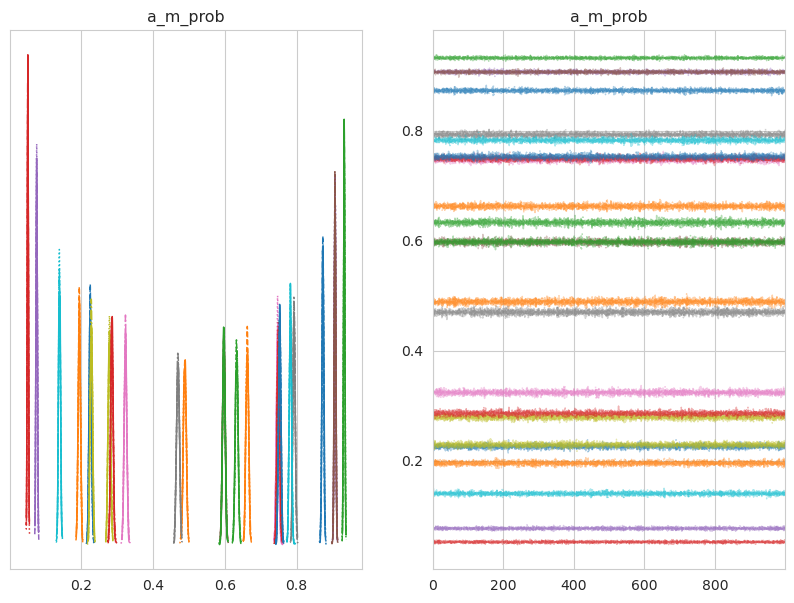

In [ ]:
az.plot_trace(posterior_dict, var_names=['a_m'], figsize=(10, 7))